# Visualize Metrics from Distributed Dask Training
Metrics:

□ Workers vs time

□ Grad time vs time

□ Worker compute time vs time

□ Worker compute time vs batch size

□ Workers vs batch size

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
metrics = pd.read_csv("loop_metrics_r0.csv")[:-11]

In [16]:
metrics.head(5)

,Unnamed: 0,grad_time,bs,n_workers,loop_time,kwargs,idx
0,0,0.084668,9,3,0.139061,"{'lr': 0.0433062924, 'batch_growth_rate': 0.34...",0
1,1,0.043590,9,3,0.067329,"{'lr': 0.0433062924, 'batch_growth_rate': 0.34...",1
2,2,0.038835,9,3,0.062500,"{'lr': 0.0433062924, 'batch_growth_rate': 0.34...",2
3,3,0.036248,9,3,0.060537,"{'lr': 0.0433062924, 'batch_growth_rate': 0.34...",3
4,4,0.029689,9,3,0.054636,"{'lr': 0.0433062924, 'batch_growth_rate': 0.34...",4


In [33]:
bs_data = metrics["bs"].tolist()
time_data = metrics["loop_time"].tolist()
worker_data = metrics["n_workers"].tolist()
assert len(bs_data) == len(time_data) == len(worker_data)

In [39]:
# Find average time for loop at each batch size
bs_avg = []
n_workers = []
time_avgs = []
# calculate
cur_bs = 9
cur_total = 0
cur_n = 0
for bs, time, workers in zip(bs_data, time_data, worker_data):
    if bs not in bs_avg:
        bs_avg.append(bs)
        n_workers.append(workers)
    if cur_bs != bs:
        time_avgs.append(cur_total / cur_n)
        cur_bs = bs
        cur_total = 0
        cur_n = 0
    cur_total += time
    cur_n += 1
time_avgs.append(cur_total / cur_n)
# check
assert len(bs_avg) == len(time_avgs)

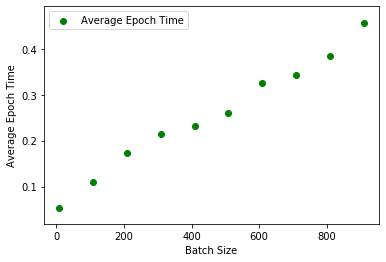

In [40]:
plt.scatter(bs_avg, time_avgs, c="g", alpha=1.0, label="Average Epoch Time")
plt.xlabel("Batch Size")
plt.ylabel("Average Epoch Time")
plt.legend(loc='upper left')
plt.show()

In [41]:
# Plot workers vs batch size
print(n_workers)
print(bs_avg)
assert len(n_workers) == len(bs_avg)

[3, 3, 3, 4, 6, 7, 9, 11, 12, 14]
[9, 109, 209, 309, 409, 509, 609, 709, 809, 909]


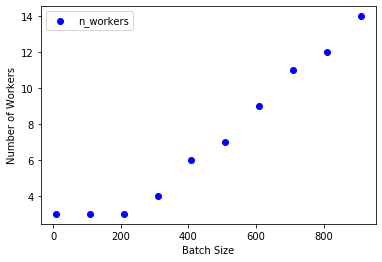

In [60]:
plt.scatter(bs_avg, n_workers, c="b", alpha=1.0, label="n_workers")
plt.xlabel("Batch Size")
plt.ylabel("Number of Workers")
plt.legend(loc='upper left')
plt.show()

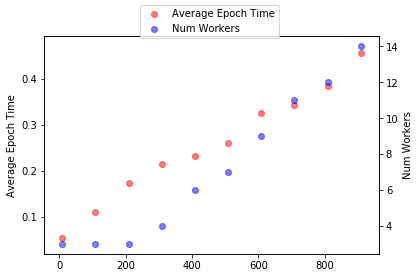

In [70]:
# both?
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(bs_avg, time_avgs, c='r', alpha=0.5)
ax1.set_ylabel('Average Epoch Time')

ax2 = ax1.twinx()
ax2.scatter(bs_avg, n_workers, c='b', alpha=0.5)
ax2.set_ylabel('Num Workers')
fig.legend(["Average Epoch Time", "Num Workers"], loc='upper center')
plt.show()

In [72]:
fig.savefig("_epoch_vs_bs_vs_workers.png")